# Life Expectancy GDP Project

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website

## What are we analyzing?

Describe data

## Questions to be answered

Give analysis questions

In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## Loading the Data

In [3]:
df = pd.read_csv("all_data.csv")
print(df.head())

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


## Exploring the Data

Utilizing the unique function of the pandas library, we are able to view the distinct countries and years within the dataset.
This step shows us that there are six different countries: Chile, China, Germany, Mexico, United States of America, and Zimbabwe.
Additionally, we can see that the data ranges from 2000 to 2015.

In [5]:
print(df.Country.unique())
print(df.Year.unique())



['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


## Cleaning Data

To clean the data, I changed the column names to be lowercase and shortened, when necessary.

In [8]:
df.rename(columns = {'Country': 'country', 'Year':'year', 'Life expectancy at birth (years)' : 'life_expectancy', 'GDP':'gdp'}, inplace = True)
print(df.head())

  country  year  life_expectancy           gdp
0   Chile  2000             77.3  7.786093e+10
1   Chile  2001             77.3  7.097992e+10
2   Chile  2002             77.8  6.973681e+10
3   Chile  2003             77.9  7.564346e+10
4   Chile  2004             78.0  9.921039e+10


## Exploring the Data with Graphs

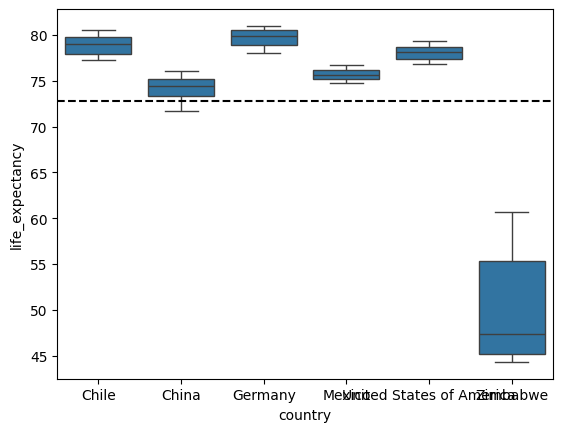

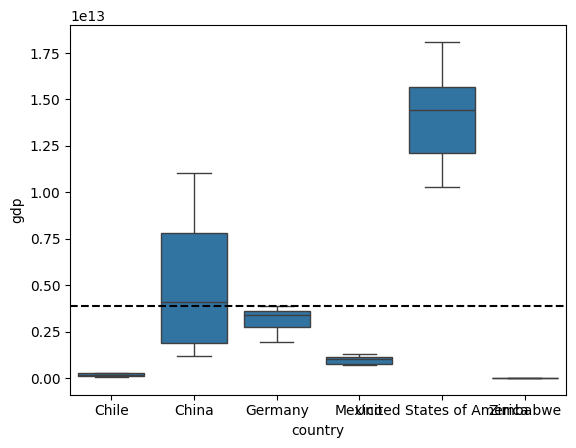

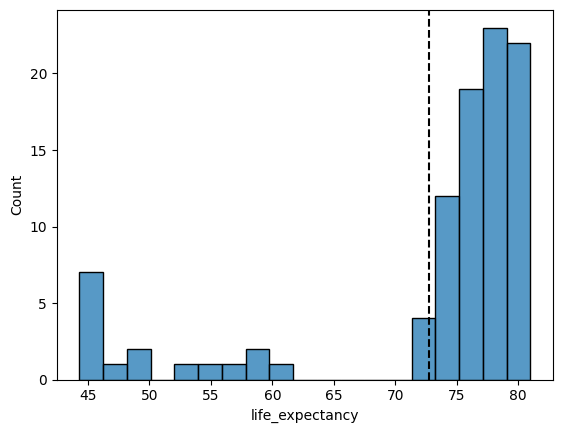

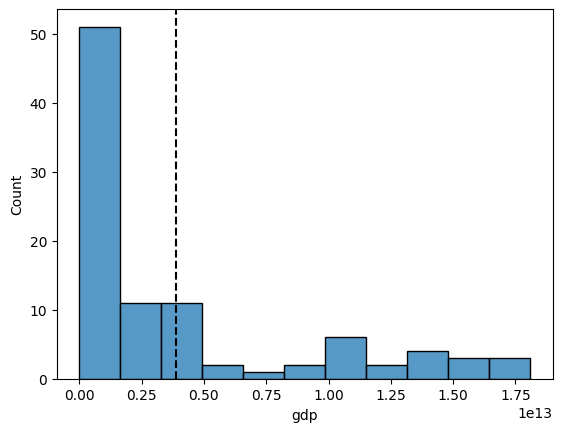

<Figure size 640x480 with 0 Axes>

In [27]:
def create_boxplot(x, y, dataset):
    sns.boxplot(x=x, y=y, data=dataset)
    mean = np.mean(dataset[y])
    plt.axhline(mean, color = 'black', ls = '--')
    plt.show()
    plt.clf()

def create_hist(column, dataset):
    sns.histplot(x=column, data = dataset)
    mean = np.mean(dataset[column])
    plt.axvline(mean, color = 'black', ls = '--')
    plt.show()
    plt.clf()

create_boxplot('country', 'life_expectancy', df)
create_boxplot('country', 'gdp', df)    

create_hist('life_expectancy', df)
create_hist('gdp', df)

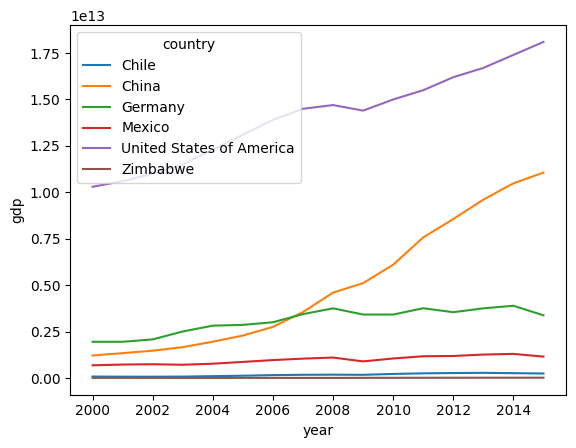

<Figure size 640x480 with 0 Axes>

In [30]:
def create_lineplot(x,y,dataset,hue):
    sns.lineplot(x=x, y=y,data=dataset,hue=hue)
    plt.show()
    plt.clf()

create_lineplot('year', 'gdp', df, 'country')